# Importing libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
file = 'Amazon Sale Report.csv'
data = pd.read_csv(file, sep=',', encoding='ISO-8859-1')
df = pd.DataFrame(data)

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.shape

(128976, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# Data cleaning & preprocessing

## Missing values

In [6]:
df.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

### Ship State

In [7]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [8]:
# Replacing the names of states with correct ones
df['ship-state'] = df['ship-state'].replace(['APO'], 'ARMY POST OFFICE')
df['ship-state'] = df['ship-state'].replace(['AR'], 'ARUNACHAL PRADESH')
df['ship-state'] = df['ship-state'].replace(['New Delhi'], 'DELHI')
df['ship-state'] = df['ship-state'].replace(['NL'], 'NAGALAND')
df['ship-state'] = df['ship-state'].replace(['Orissa', 'orissa'], 'ODISHA')
df['ship-state'] = df['ship-state'].replace(['Punjab/Mohali/Zirakpur', 'PB'], 'PUNJAB')
df['ship-state'] = df['ship-state'].replace(['Pondicherry'], 'PUDUCHERRY')
df['ship-state'] = df['ship-state'].replace(['RJ', 'Rajshthan', 'rajsthan', 'Rajsthan'], 'RAJASTHAN')

In [9]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Manipur', 'rajasthan', 'Odisha',
       'Bihar', 'MIZORAM', 'punjab', 'Rajasthan', 'Puducherry', 'delhi',
       'Chandigarh', 'LAKSHADWEEP', 'goa', 'ARMY POST OFFICE',
       'Arunachal Pradesh', 'Sikkim', 'Arunachal pradesh', 'Nagaland',
       'bihar', 'Mizoram', 'Meghalaya'], dtype=object)

In [10]:
df['ship-state'] = df['ship-state'].str.title()

In [11]:
df['ship-state'].value_counts().sort_values(ascending=False)

ship-state
Maharashtra          22272
Karnataka            17324
Tamil Nadu           11488
Telangana            11330
Uttar Pradesh        10646
Delhi                 7044
Kerala                6577
West Bengal           5962
Andhra Pradesh        5427
Gujarat               4482
Haryana               4410
Rajasthan             2720
Madhya Pradesh        2532
Odisha                2139
Bihar                 2113
Punjab                1921
Assam                 1664
Uttarakhand           1552
Jharkhand             1457
Goa                   1137
Chhattisgarh           909
Himachal Pradesh       789
Jammu & Kashmir        702
Puducherry             349
Chandigarh             334
Manipur                314
Andaman & Nicobar      256
Meghalaya              207
Sikkim                 205
Nagaland               187
Tripura                151
Arunachal Pradesh      147
Mizoram                 76
Dadra And Nagar         70
Ladakh                  43
Lakshadweep              4
Army Post Office 

In [12]:
df.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [13]:
# Dropping two features with all empty rows

df.drop(['New', 'PendingS'], axis=1, inplace=True)

In [14]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [15]:
df['ship-state'].isna().sum()

35

In [16]:
# Dropping the missing values from the ship-state feature as it is significantly less
df.dropna(subset=['ship-state'], inplace=True)

In [17]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7798
Amount                 7798
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89691
dtype: int64

* **By removing the null values of `ship-state`, consequently the null values of `ship-city`, `ship-postal-code`, `ship-country` are handled as well.**

### Currency

In [18]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [19]:
df['currency'].value_counts()

currency
INR    121143
Name: count, dtype: int64

* **Replacing the missing values with `INR`**

In [20]:
df['currency'].fillna('INR', inplace=True)

In [21]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                 7798
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89691
dtype: int64

### Amount

* We can replace the missing values with `0` as most of these orders are either `Cancelled` or `Returned to buyer`

In [22]:
df['Amount'].fillna(0, inplace=True)

In [23]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89691
dtype: int64

### Fulfilled-By

In [24]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [25]:
df['fulfilled-by'].value_counts()

fulfilled-by
Easy Ship    39250
Name: count, dtype: int64

* **Replacing the null values with `Others` as it can represent any other shipment companies that fulfilled the order**

In [26]:
df['fulfilled-by'].fillna('Others', inplace=True)

In [27]:
df['fulfilled-by'].value_counts()

fulfilled-by
Others       89691
Easy Ship    39250
Name: count, dtype: int64

In [28]:
df.isna().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

# Analysis of the data for BI

## Delivery Analysis

In [29]:
df['Status'].value_counts().sort_values(ascending=False)

Status
Shipped                          77797
Shipped - Delivered to Buyer     28749
Cancelled                        18327
Shipped - Returned to Seller      1951
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [30]:
df['Courier Status'].value_counts()

Courier Status
Shipped       109458
On the Way      6867
Unshipped       6678
Cancelled       5938
Name: count, dtype: int64

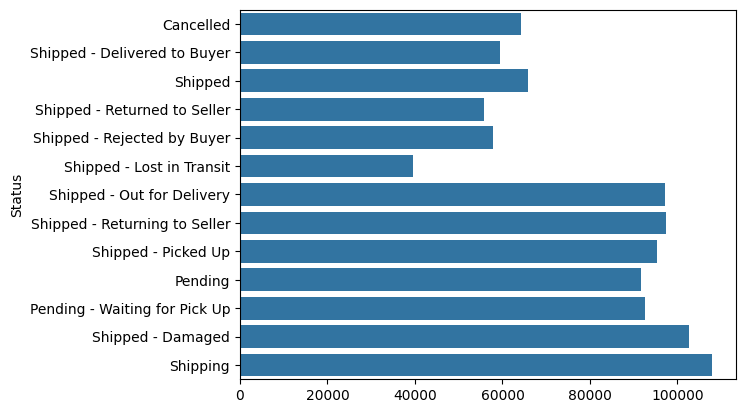

In [31]:
sns.barplot(df['Status'], errorbar=None)
plt.show()

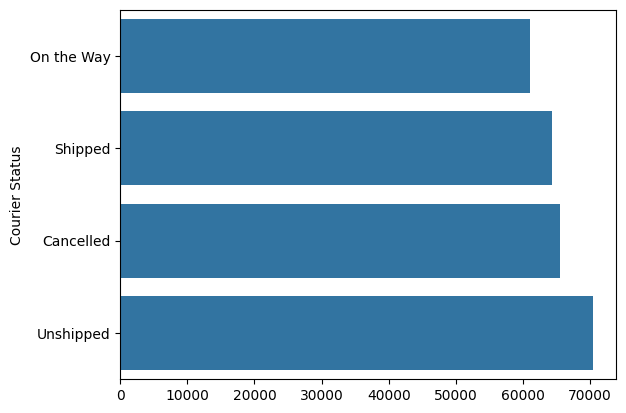

In [334]:
sns.barplot(df['Courier Status'], errorbar=None)
plt.show()

In [33]:
pd.crosstab(df['Status'], df['Courier Status'])

Courier Status,Cancelled,On the Way,Shipped,Unshipped
Status,,,,
Cancelled,5843,6856,0,5628
Pending,2,0,10,646
Pending - Waiting for Pick Up,0,0,0,281
Shipped,93,0,77589,115
Shipped - Damaged,0,0,1,0
Shipped - Delivered to Buyer,0,8,28741,0
Shipped - Lost in Transit,0,0,5,0
Shipped - Out for Delivery,0,0,35,0
Shipped - Picked Up,0,0,973,0


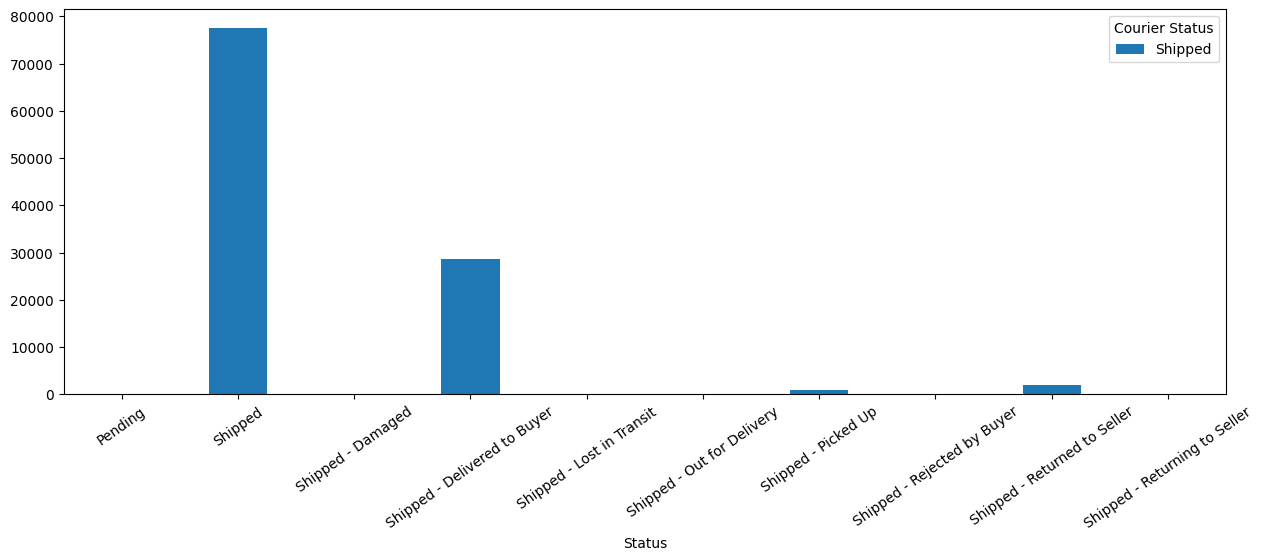

In [660]:
filtered_df = df[df['Courier Status'] == 'Shipped']
pd.crosstab(filtered_df['Status'], filtered_df['Courier Status']).plot(kind='bar', figsize=(15,5), rot=35)
plt.show()

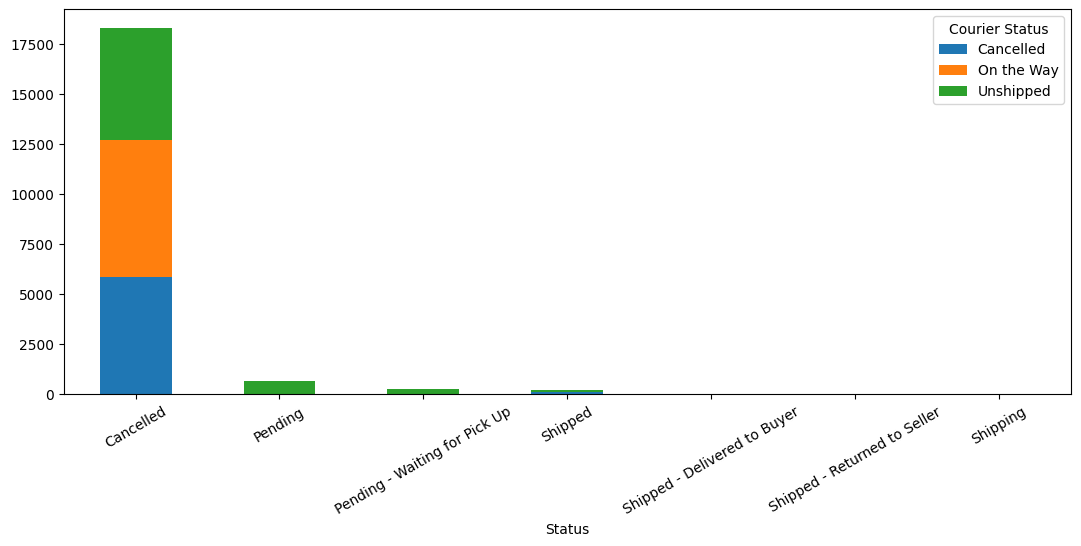

In [627]:
filtered_df = df[(df['Courier Status'] == 'Unshipped') | (df['Courier Status'] == 'Cancelled') | (df['Courier Status'] == 'On the Way')]
pd.crosstab(filtered_df['Status'], filtered_df['Courier Status']).plot(kind='bar', stacked=True, figsize=(13,5), rot=30)
#plt.xticks(rotation=30)
plt.show()

In [284]:
cs = pd.DataFrame(df.groupby(['Courier Status'])[['Qty', 'Amount']].sum().reset_index())

In [285]:
cs

,Courier Status,Qty,Amount
0,Cancelled,0,0.00
1,On the Way,0,3188713.25
2,Shipped,109866,71039425.00
3,Unshipped,6750,4342410.00


In [286]:
s = pd.DataFrame(df.groupby(['Status'])[['Qty', 'Amount']].sum().reset_index())

In [287]:
s

,Status,Qty,Amount
0,Cancelled,5654,6916393.25
1,Pending,657,430271.00
2,Pending - Waiting for Pick Up,283,192138.00
3,Shipped,78002,50319259.00
4,Shipped - Damaged,1,1136.00
5,Shipped - Delivered to Buyer,28865,18637347.00
6,Shipped - Lost in Transit,5,1997.00
7,Shipped - Out for Delivery,35,26971.00
8,Shipped - Picked Up,977,661252.00
9,Shipped - Rejected by Buyer,11,7295.00


## Efficiency of the merchants

In [403]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89691
Merchant    39250
Name: count, dtype: int64

In [38]:
crosstab_data = pd.crosstab(df['Fulfilment'], df['Courier Status'])

In [40]:
crosstab_data

Courier Status,Cancelled,On the Way,Shipped,Unshipped
Fulfilment,,,,
Amazon,5938,0,77599,6154
Merchant,0,6867,31859,524


In [288]:
f = pd.DataFrame(df.groupby(['Fulfilment'])[['Qty', 'Amount']].sum().reset_index())

In [289]:
f

,Fulfilment,Qty,Amount
0,Amazon,84077,54315723.00
1,Merchant,32539,24254825.25


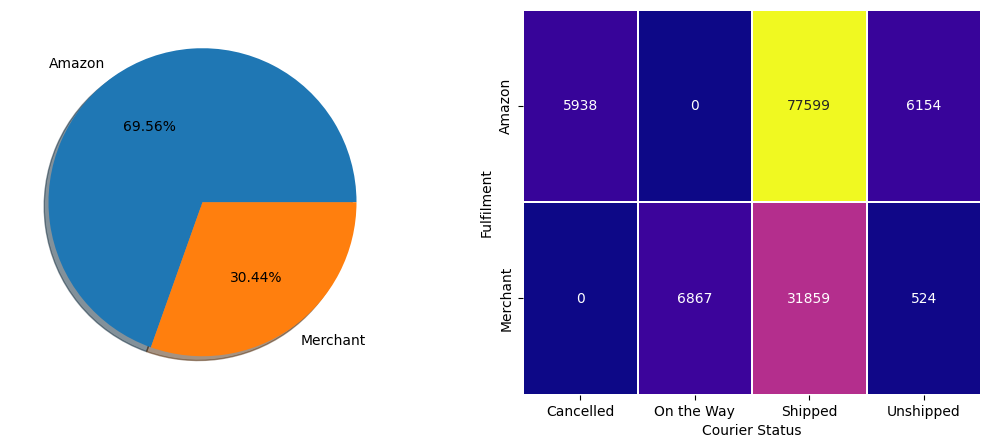

In [66]:
fig, ax = plt.subplots(1,2, figsize=(13, 5))
ax[0].pie(x=df['Fulfilment'].value_counts(), labels=df['Fulfilment'].value_counts().index, autopct='%1.2f%%', shadow=True)
sns.heatmap(crosstab_data, annot=True, fmt='.0f', cmap='plasma', linewidth=0.05, cbar=False, ax=ax[1])
plt.show()

In [59]:
pd.crosstab(df['Fulfilment'], df['Status'])

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
Fulfilment,,,,,,,,,,,,,
Amazon,11471,415,0,77797,0,0,0,0,0,0,0,0,8
Merchant,6856,243,281,0,1,28749,5,35,973,11,1951,145,0


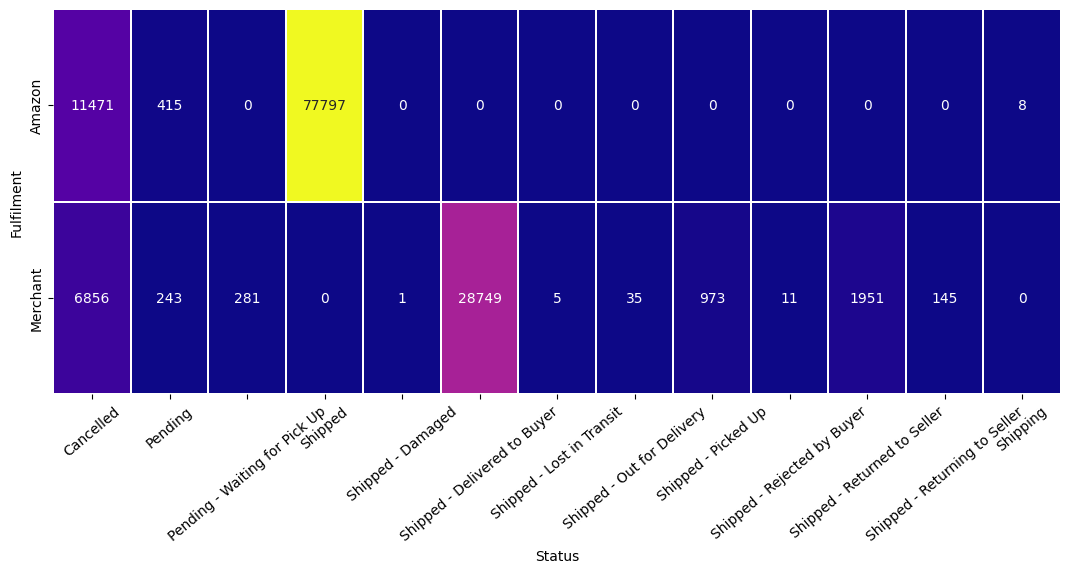

In [83]:
plt.figure(figsize=(13,5))
ct = pd.crosstab(df['Fulfilment'], df['Status'])
sns.heatmap(ct, annot=True, fmt='.0f', cmap='plasma', linewidth=0.05, cbar=False)
plt.xticks(rotation=40)
plt.show()

In [84]:
df['Sales Channel'].value_counts()

Sales Channel
Amazon.in     128817
Non-Amazon       124
Name: count, dtype: int64

In [291]:
sc = pd.DataFrame(df.groupby(['Sales Channel'])[['Qty', 'Amount']].sum().reset_index())

In [292]:
sc

,Sales Channel,Qty,Amount
0,Amazon.in,116449,78570548.25
1,Non-Amazon,167,0.00


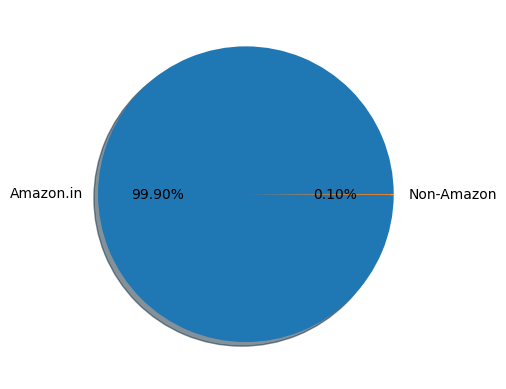

In [89]:
plt.pie(x=df['Sales Channel'].value_counts(), labels=df['Sales Channel'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.show()

## Product Analysis

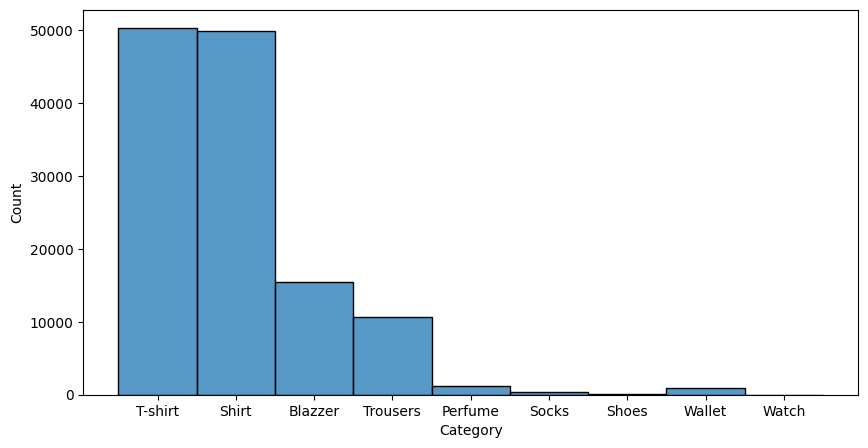

In [636]:
plt.figure(figsize=(10,5))
sns.histplot(df['Category'])
plt.show()

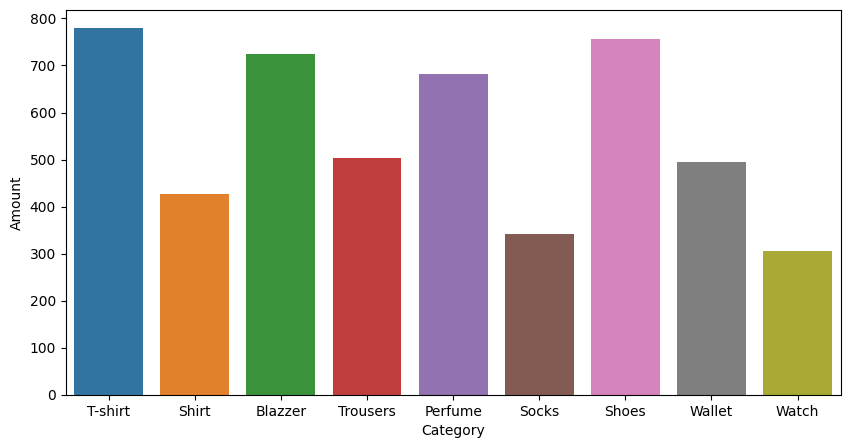

In [118]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Category'], y=df['Amount'], hue=df['Category'], errorbar=None)
plt.show()

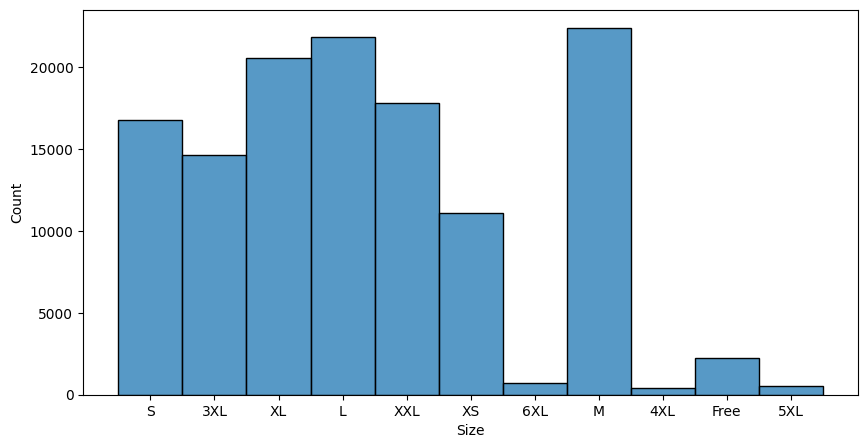

In [122]:
plt.figure(figsize=(10,5))
sns.histplot(df['Size'])
plt.show()

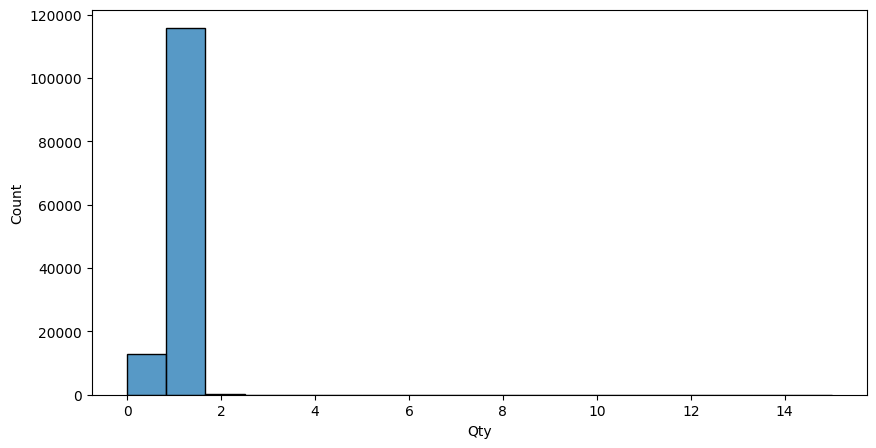

In [640]:
plt.figure(figsize=(10,5))
sns.histplot(df['Qty'])
plt.show()

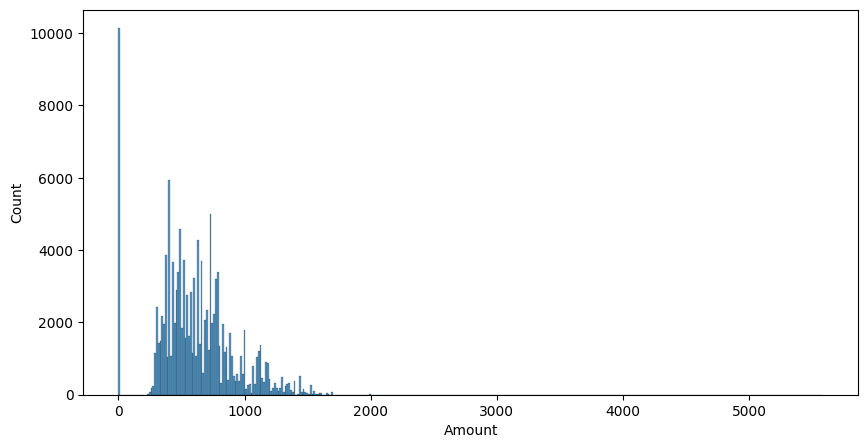

In [95]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'])
plt.show()

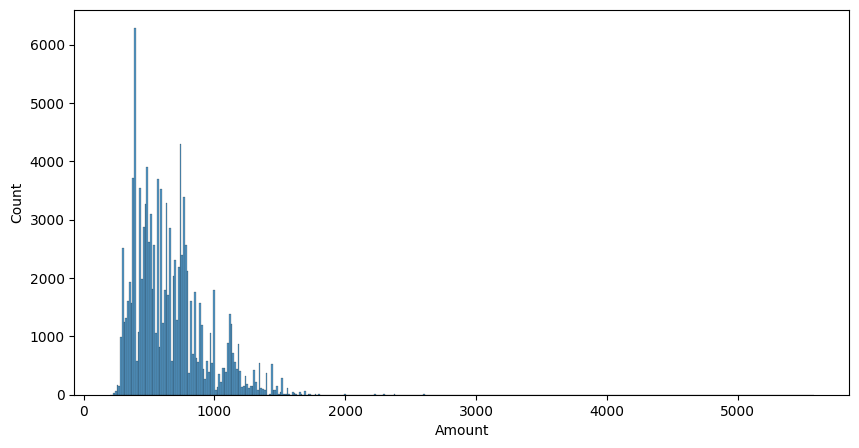

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Amount'] > 0]['Amount'])
plt.show()

In [98]:
df['Amount'].describe()

count    128941.000000
mean        609.352714
std         313.354673
min           0.000000
25%         413.000000
50%         583.040000
75%         771.000000
max        5584.000000
Name: Amount, dtype: float64

In [641]:
df['Qty'].value_counts()

Qty
1     115749
0      12805
2        340
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64

In [90]:
df['Category'].value_counts()

Category
T-shirt     50280
Shirt       49858
Blazzer     15499
Trousers    10613
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64

In [92]:
df['Size'].value_counts()

Size
M       22366
L       21796
XL      20545
XXL     17803
S       16770
3XL     14642
XS      11055
Free     2251
6XL       738
5XL       550
4XL       425
Name: count, dtype: int64

* **Lets see the total quantity of items purchased in each category & their size**

In [116]:
pd.crosstab(df['Category'], df['Size'], values=df['Qty'], aggfunc='sum')

Size,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Category,,,,,,,,,,,
Blazzer,1758.0,NaN,NaN,NaN,NaN,2545.0,2326.0,1963.0,2126.0,1279.0,1945.0
Perfume,NaN,NaN,NaN,NaN,1051.0,NaN,NaN,NaN,NaN,NaN,NaN
Shirt,5133.0,350.0,456.0,616.0,NaN,8043.0,7704.0,5160.0,7837.0,2787.0,6943.0
Shoes,NaN,NaN,NaN,NaN,153.0,NaN,NaN,NaN,NaN,NaN,NaN
Socks,60.0,NaN,NaN,NaN,NaN,68.0,50.0,67.0,64.0,26.0,64.0
T-shirt,5287.0,46.0,57.0,72.0,NaN,7393.0,8360.0,6701.0,6872.0,4889.0,5604.0
Trousers,1121.0,NaN,NaN,NaN,NaN,1646.0,1693.0,1146.0,1734.0,868.0,1687.0
Wallet,NaN,NaN,NaN,NaN,863.0,NaN,NaN,NaN,NaN,NaN,NaN
Watch,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


* **Lets see the total amount spent on the items purchased in each category & their size**

In [115]:
pd.crosstab(df['Category'], df['Size'], values=df['Amount'], aggfunc='sum')

Size,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Category,,,,,,,,,,,
Blazzer,1406828.11,NaN,NaN,NaN,NaN,2026215.69,1879720.49,1602762.85,1727110.99,998881.05,1572849.94
Perfume,NaN,NaN,NaN,NaN,789419.66,NaN,NaN,NaN,NaN,NaN,NaN
Shirt,2454420.34,275401.40,357467.63,485831.26,NaN,3729620.17,3543310.45,2351260.64,3631637.95,1240043.34,3220310.90
Shoes,NaN,NaN,NaN,NaN,124752.76,NaN,NaN,NaN,NaN,NaN,NaN
Socks,24332.63,NaN,NaN,NaN,NaN,25391.21,19580.59,22598.76,25879.63,9491.72,23482.96
T-shirt,4529937.41,57312.24,67689.00,90418.07,NaN,6351890.10,7303951.89,5830375.07,5936141.97,4266712.00,4763380.90
Trousers,618261.81,NaN,NaN,NaN,NaN,900070.86,942664.71,617436.62,933386.84,449265.47,883726.99
Wallet,NaN,NaN,NaN,NaN,458408.18,NaN,NaN,NaN,NaN,NaN,NaN
Watch,NaN,NaN,NaN,NaN,915.00,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
pd.crosstab(df['Category'], df['Size'])

Size,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Category,,,,,,,,,,,
Blazzer,1913,0,0,0,0,2844,2587,2226,2380,1430,2119
Perfume,0,0,0,0,1157,0,0,0,0,0,0
Shirt,5686,377,489,657,0,8918,8552,5726,8668,3136,7649
Shoes,0,0,0,0,165,0,0,0,0,0,0
Socks,64,0,0,0,0,72,58,74,71,28,73
T-shirt,5796,48,61,81,0,8189,9348,7506,7571,5514,6166
Trousers,1183,0,0,0,0,1773,1821,1238,1855,947,1796
Wallet,0,0,0,0,926,0,0,0,0,0,0
Watch,0,0,0,0,3,0,0,0,0,0,0


In [94]:
pd.crosstab(df['Size'], df['Qty'])

Qty,0,1,2,3,4,5,8,9,13,15
Size,,,,,,,,,,
3XL,1331,13270,37,2,1,1,0,0,0,0
4XL,31,392,2,0,0,0,0,0,0,0
5XL,38,511,1,0,0,0,0,0,0,0
6XL,51,686,1,0,0,0,0,0,0,0
Free,210,2028,9,3,0,0,0,0,0,1
L,2176,19556,60,2,1,0,0,1,0,0
M,2315,19985,53,10,3,0,0,0,0,0
S,1787,14936,41,5,1,0,0,0,0,0
XL,1974,18517,48,5,0,1,0,0,0,0


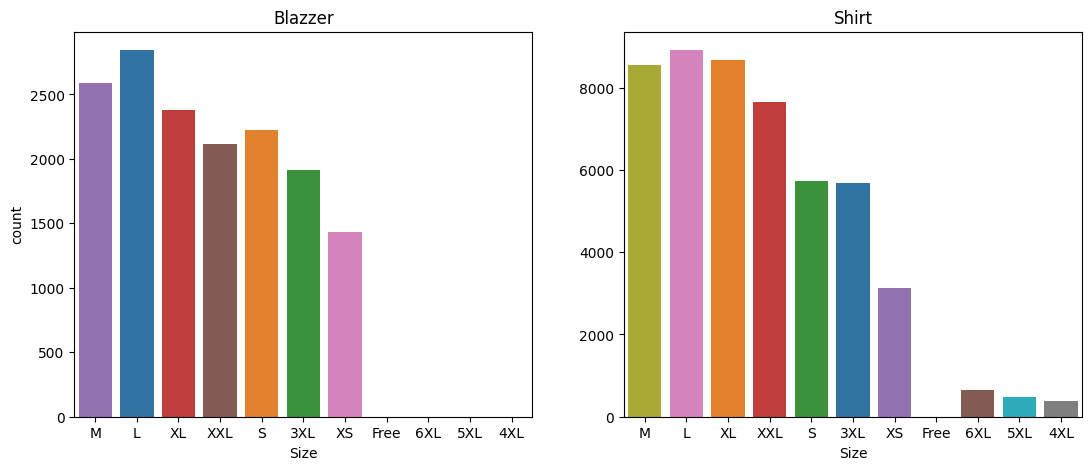

In [127]:
fig, ax = plt.subplots(1,2, figsize=(13, 5))
sns.countplot(x='Size', data=df[df['Category']=='Blazzer'], hue='Size', order=df['Size'].value_counts().index, ax=ax[0])
sns.countplot(x='Size', data=df[df['Category']=='Shirt'], hue='Size', order=df['Size'].value_counts().index, ax=ax[1])
ax[0].set_title('Blazzer')
ax[1].set_title('Shirt')
ax[1].set_ylabel('')
plt.show()

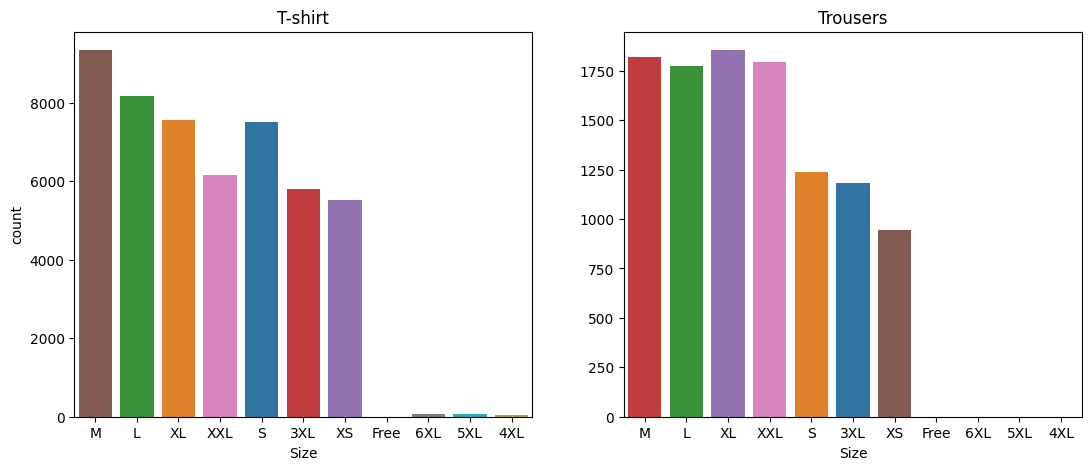

In [130]:
fig, ax = plt.subplots(1,2, figsize=(13, 5))
sns.countplot(x='Size', data=df[df['Category']=='T-shirt'], hue='Size', order=df['Size'].value_counts().index, ax=ax[0])
sns.countplot(x='Size', data=df[df['Category']=='Trousers'], hue='Size', order=df['Size'].value_counts().index, ax=ax[1])
ax[0].set_title('T-shirt')
ax[1].set_title('Trousers')
ax[1].set_ylabel('')
plt.show()

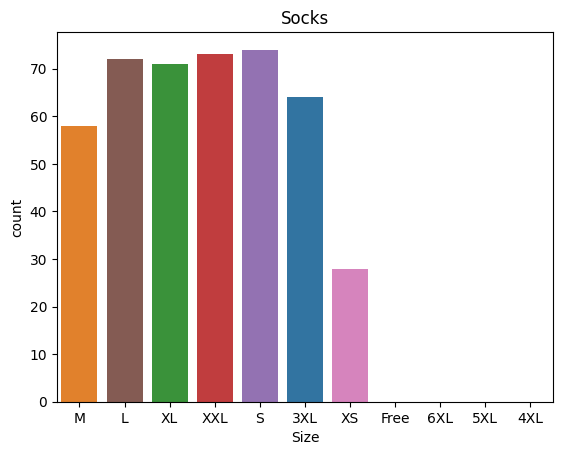

In [131]:
sns.countplot(x='Size', data=df[df['Category']=='Socks'], hue='Size', order=df['Size'].value_counts().index)
plt.title('Socks')
plt.show()

In [293]:
p = pd.DataFrame(df.groupby(['Category'])[['Qty', 'Amount']].sum().reset_index())

In [294]:
p

,Category,Qty,Amount
0,Blazzer,13942,11214369.12
1,Perfume,1051,789419.66
2,Shirt,45029,21289304.08
3,Shoes,153,124752.76
4,Socks,399,150757.50
5,T-shirt,45281,39197808.65
6,Trousers,9895,5344813.30
7,Wallet,863,458408.18
8,Watch,3,915.00


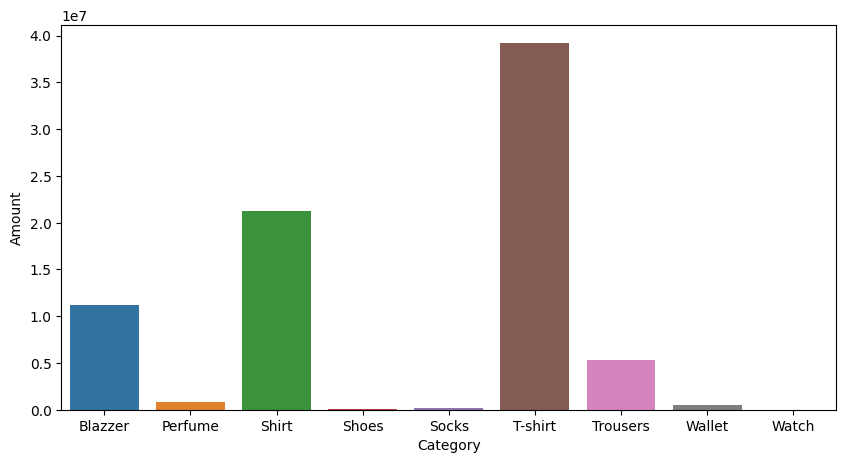

In [335]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Amount', data=p, hue='Category', errorbar=None)
plt.show()

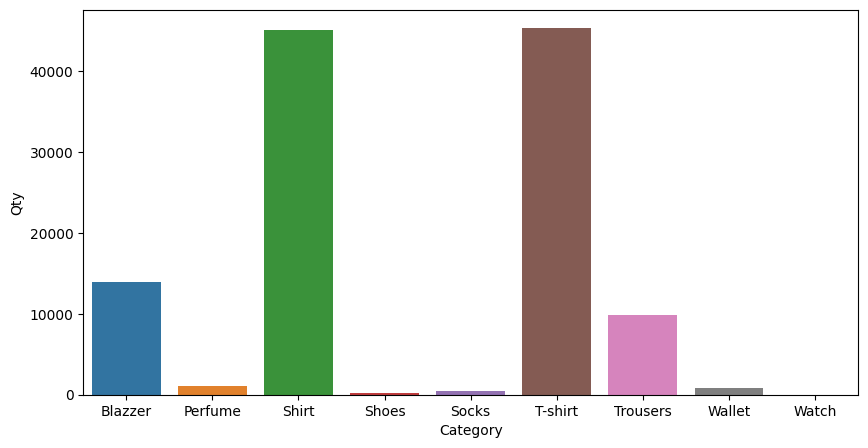

In [336]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Qty', data=p, hue='Category', errorbar=None)
plt.show()

In [337]:
pd.DataFrame(df.groupby(['Size'])[['Qty', 'Amount']].sum().reset_index())

,Size,Qty,Amount
0,3XL,13359,9033780.30
1,4XL,396,332713.64
2,5XL,513,425156.63
3,6XL,688,576249.33
4,Free,2070,1373495.60
5,L,19695,13033188.03
6,M,20133,13689228.13
7,S,15037,10424433.94
8,XL,18633,12254157.38
9,XS,9849,6964393.58


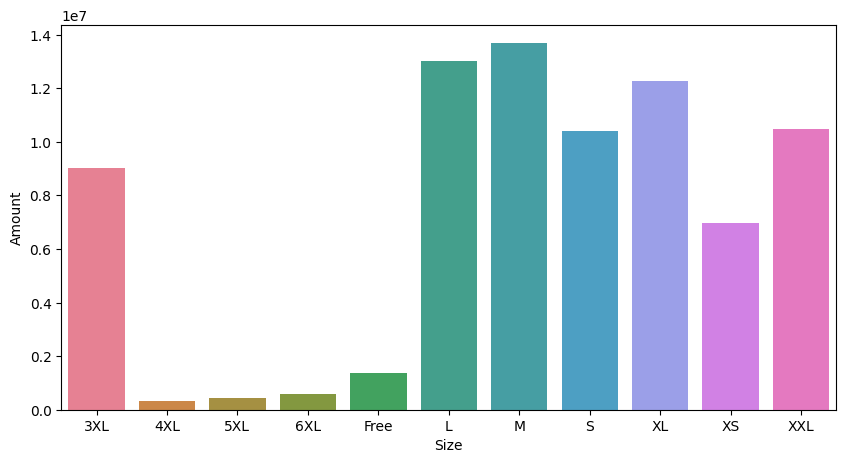

In [338]:
plt.figure(figsize=(10,5))
sns.barplot(x='Size', y='Amount', data=p2, hue='Size', errorbar=None)
plt.show()

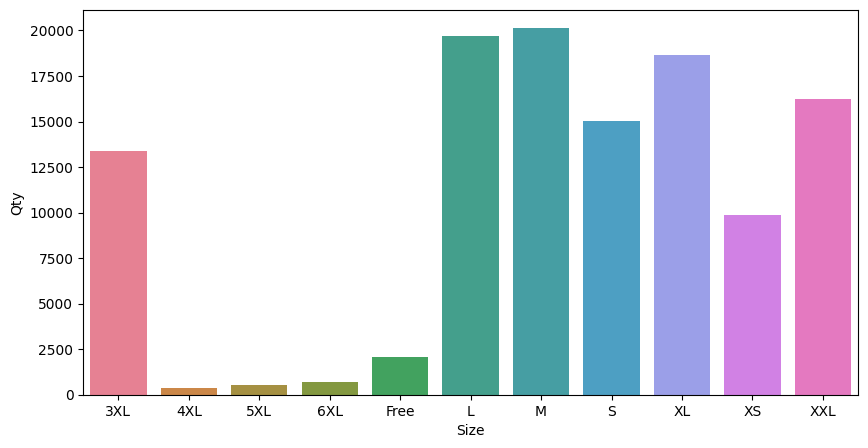

In [339]:
plt.figure(figsize=(10,5))
sns.barplot(x='Size', y='Qty', data=p2, hue='Size', errorbar=None)
plt.show()

### Product analysis report

From the above analysis we can conclude that :-

* `TShirt`, `Shirt`, `Blazzer` were the most sold categories
* In the `TShirt` category the top 5 sold sizes were in the order, `M`, `L`, `XL`, `S`, `XXL`
* In the `Shirt` category the top 5 sold sizes were in the order, `L`, `XL`, `M`, `XXL`, `S`
* In the `Trousers` category the top 5 sold sizes were in the order, `XL`, `M`, `XXL`, `L`, `S`
* In the `Blazzer` category the top 5 sold sizes were in the order, `L`, `M`, `XL`, `S`, `XXL`
* `Watches` are the least sold category with only 3 items sold

## Sales channel

In [132]:
df['Sales Channel'].value_counts()

Sales Channel
Amazon.in     128817
Non-Amazon       124
Name: count, dtype: int64

## Ship service level

In [133]:
df['ship-service-level'].value_counts()

ship-service-level
Expedited    88608
Standard     40333
Name: count, dtype: int64

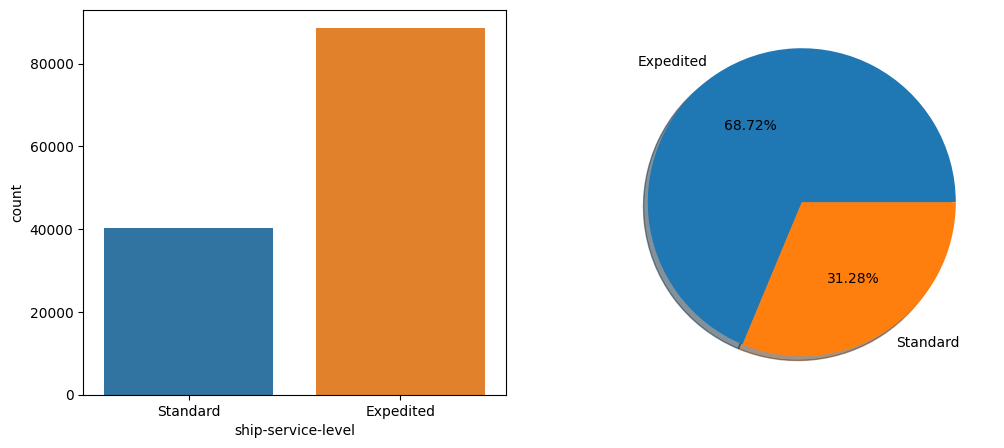

In [134]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='ship-service-level', data=df, hue='ship-service-level', ax=ax[0])

ax[1].pie(x=df['ship-service-level'].value_counts().values, labels=df['ship-service-level'].value_counts().index, autopct='%1.2f%%', shadow=True)
plt.show()

## Sales Trend

In [164]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [245]:
df['Month'] = df['Date'].dt.month_name()

In [246]:
df['Month'].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

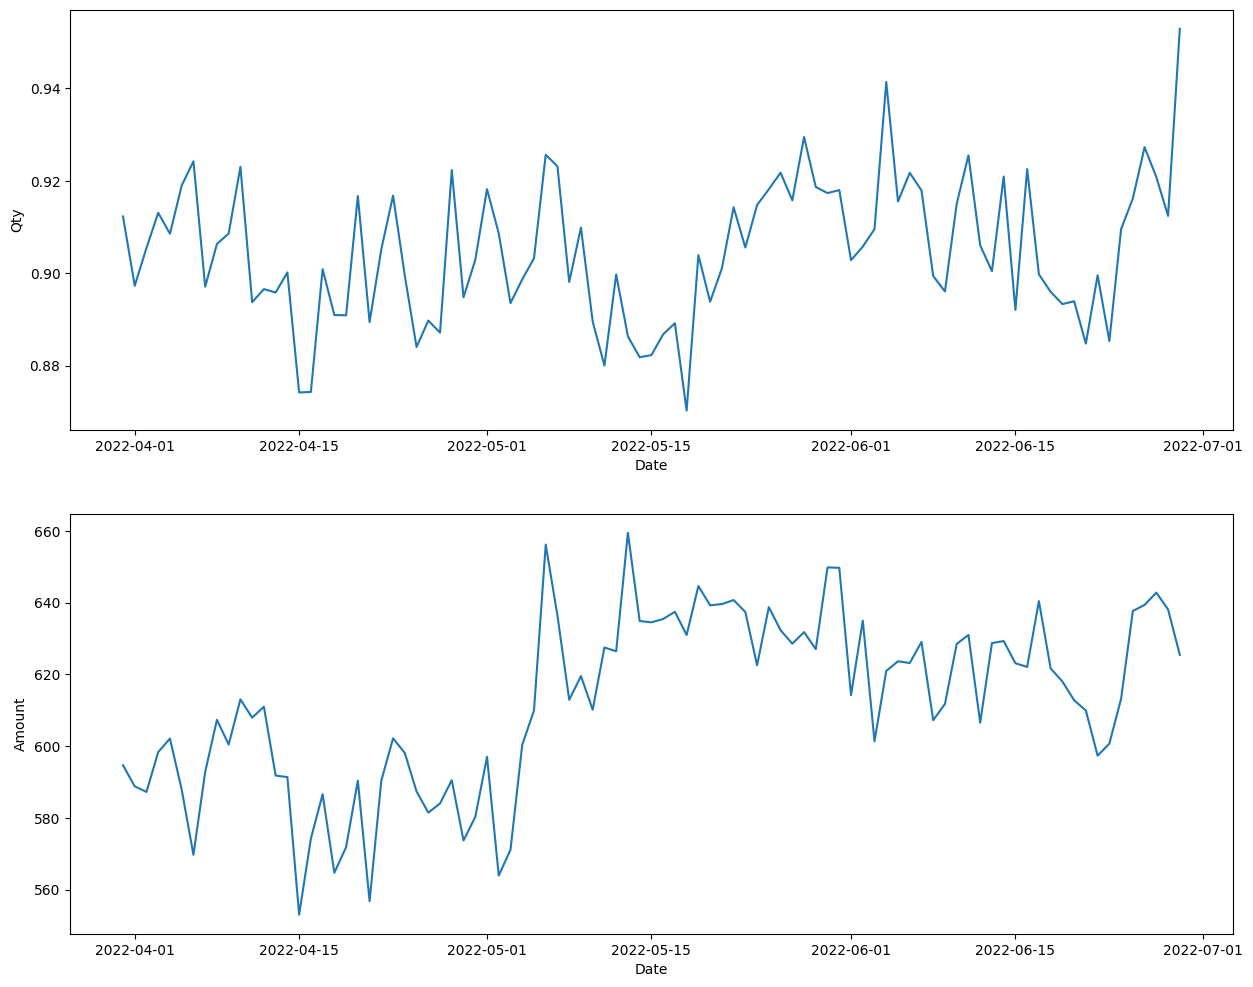

In [332]:
fig, ax = plt.subplots(2,1, figsize=(15,12))
sns.lineplot(x='Date', y='Qty', data=df, errorbar=None, ax=ax[0])
sns.lineplot(x='Date', y='Amount', data=df, errorbar=None, ax=ax[1])
plt.show()

In [247]:
monthly_report = pd.DataFrame(df.groupby('Month')[['Qty', 'Amount']].sum().reset_index())

In [255]:
monthly_report

,Month,Qty,Amount
0,April,44191,28827790.27
1,June,34269,23421223.38
2,March,156,101683.85
3,May,38000,26219850.75


In [264]:
custom_order = ['March', 'April', 'May', 'June']
sorted_report = monthly_report.sort_values(by='Month',
                                           key=lambda x: x.map({month: i for i, month in enumerate(custom_order)}))

In [265]:
sorted_report

,Month,Qty,Amount
2,March,156,101683.85
0,April,44191,28827790.27
3,May,38000,26219850.75
1,June,34269,23421223.38


In [321]:
sorted_report.iloc[0][1]

156

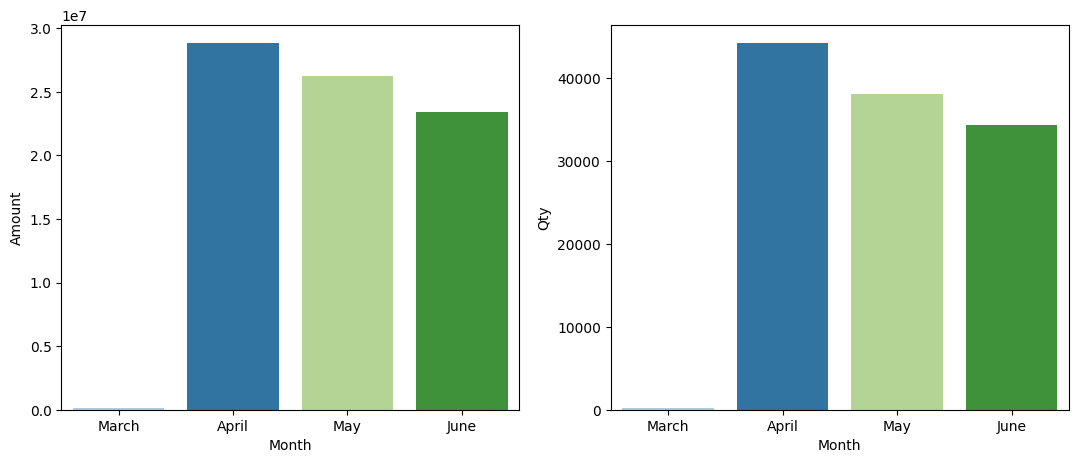

In [317]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.barplot(x='Month', y='Amount', data=sorted_report, hue='Month', palette='Paired', errorbar=None, ax=ax[0])
sns.barplot(x='Month', y='Qty', data=sorted_report, hue='Month', palette='Paired', errorbar=None, ax=ax[1])
plt.show()

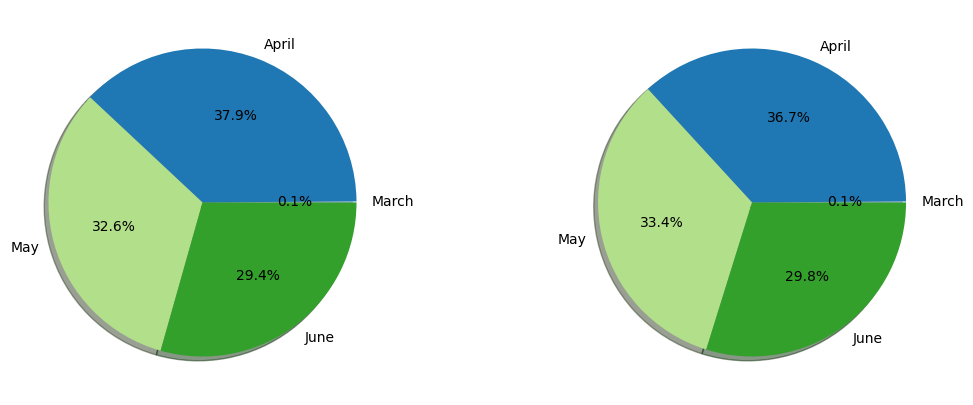

In [315]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].pie(x='Qty', labels='Month', data=sorted_report, autopct='%1.1f%%', colors=sns.color_palette('Paired'), shadow=True)
ax[1].pie(x='Amount', labels='Month', data=sorted_report, autopct='%1.1f%%', colors=sns.color_palette('Paired'), shadow=True)
plt.show()

In [322]:
# MoM growth in quantity

def growth_sales(month):
    if month == 'March':
        mom = 0
    elif month == 'April':
        mom = round(((sorted_report.iloc[1][1] - sorted_report.iloc[0][1])/sorted_report.iloc[0][1])*100, 2)
    elif month == 'May':
        mom = round(((sorted_report.iloc[2][1] - sorted_report.iloc[1][1])/sorted_report.iloc[1][1])*100, 2)
    else:
        mom = round(((sorted_report.iloc[3][1] - sorted_report.iloc[2][1])/sorted_report.iloc[2][1])*100, 2)
    return mom

In [323]:
mom_growth = [growth_sales('March'),growth_sales('April'),growth_sales('May'),growth_sales('June')]

sorted_report.insert(2, 'MoM', mom_growth)

In [324]:
sorted_report

,Month,Qty,MoM,Amount
2,March,156,0.00,101683.85
0,April,44191,28227.56,28827790.27
3,May,38000,-14.01,26219850.75
1,June,34269,-9.82,23421223.38


In [325]:
# MoM growth in amount

def growth_sales1(month):
    if month == 'March':
        mom = 0
    elif month == 'April':
        mom = round(((sorted_report.iloc[1][3] - sorted_report.iloc[0][3])/sorted_report.iloc[0][3])*100, 2)
    elif month == 'May':
        mom = round(((sorted_report.iloc[2][3] - sorted_report.iloc[1][3])/sorted_report.iloc[1][3])*100, 2)
    else:
        mom = round(((sorted_report.iloc[3][3] - sorted_report.iloc[2][3])/sorted_report.iloc[2][3])*100, 2)
    return mom

In [326]:
mom_growth1 = [growth_sales1('March'),growth_sales1('April'),growth_sales1('May'),growth_sales1('June')]

sorted_report.insert(4, 'MoM_Amount', mom_growth1)

In [327]:
sorted_report

,Month,Qty,MoM,Amount,MoM_Amount
2,March,156,0.00,101683.85,0.00
0,April,44191,28227.56,28827790.27,28250.41
3,May,38000,-14.01,26219850.75,-9.05
1,June,34269,-9.82,23421223.38,-10.67


## Locations

In [210]:
df['ship-city'] = df['ship-city'].str.title()

In [292]:
#df['ship-city'].str.extract(r'(0-9)')

In [536]:
pd.crosstab(df['ship-state'], df['Courier Status'])

Courier Status,Cancelled,On the Way,Shipped,Unshipped
ship-state,,,,
Andaman & Nicobar,12,22,206,16
Andhra Pradesh,293,341,4486,307
Army Post Office,1,0,0,0
Arunachal Pradesh,4,8,125,10
Assam,80,101,1393,90
Bihar,128,118,1753,114
Chandigarh,13,16,293,12
Chhattisgarh,34,55,774,46
Dadra And Nagar,4,8,56,2


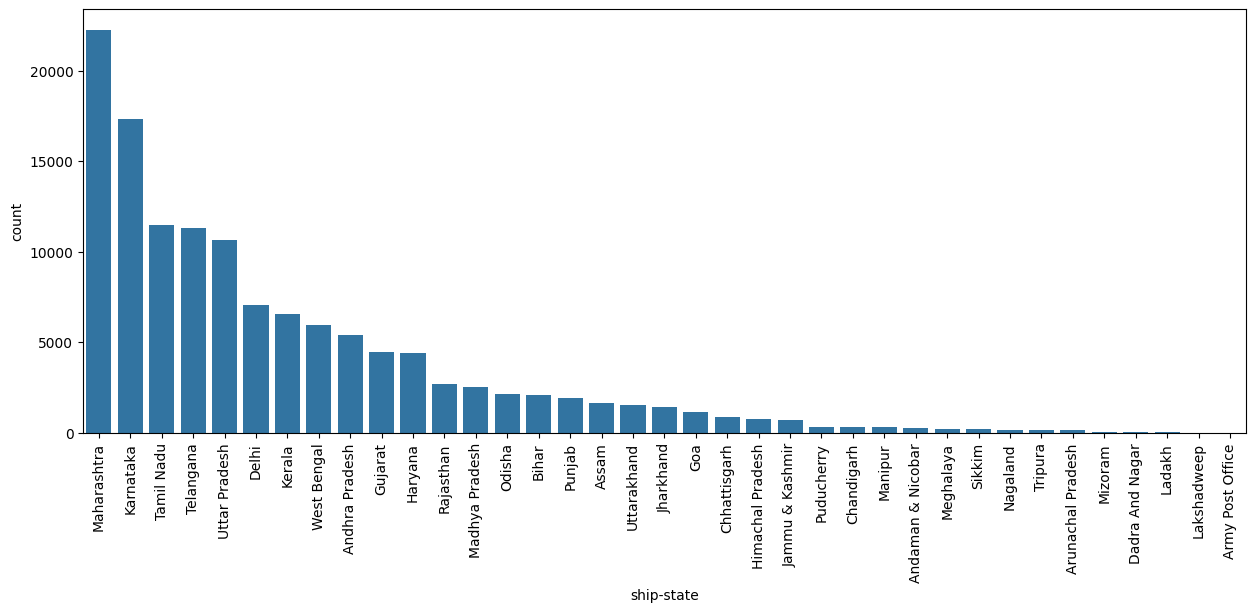

In [220]:
plt.figure(figsize=(15,5.5))
sns.countplot(x='ship-state', data=df, order=df['ship-state'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

The top 5 states which has the highest sales are:-
* Maharashtra
* Karnataka
* Tamil Nadu
* Telengana
* Uttar Pradesh